<a href="https://colab.research.google.com/github/gurung-ajay/Sentiment-Analysis-on-IMDB-reviews-with-Deep-Learning/blob/main/Sentiment_Analysis_on_IMDB_reviews_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on IMDB reviews with ANN models

Using: Tensorflow, Pandas and Matplotlib

In this project I am trying to build an Artificial Neural Network(ANN) model that trains on data about IMDB reviews which are classified as positive or negative. After training, it will be able to predict if a reivew is positive or negative on new data.

Data consists of two columns:
* First column has IMDB reviews
* Second column has Sentiment

To find the best model, I have tried experimenting with three models: Simple Neural Network model, LSTM model and Bidirectional LSTM Model.

Downloading datasets

In [ ]:
!gdown https://drive.google.com/uc?id=1_JycQl_WP8jBlU24k9USI4MstAooXovq&export=download # train dataset

Downloading...
From: https://drive.google.com/uc?id=1_JycQl_WP8jBlU24k9USI4MstAooXovq
To: /content/imdb_reviews.csv
100% 31.7M/31.7M [00:00<00:00, 76.2MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1lg3ELpSs162URKNF4lYSmA_W7Lifxtd0&export=download # test dataset

Downloading...
From: https://drive.google.com/uc?id=1lg3ELpSs162URKNF4lYSmA_W7Lifxtd0
To: /content/test_reviews.csv
100% 30.5M/30.5M [00:00<00:00, 82.5MB/s]


# Importing Libraries

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocessing Data

In [ ]:
df_train = pd.read_csv('/content/imdb_reviews.csv')
df_test = pd.read_csv('/content/test_reviews.csv')

In [ ]:
df_train.head(2)

,Reviews,Sentiment
0,<START this film was just brilliant casting lo...,positive
1,<START big hair big boobs bad music and a gian...,negative


In [ ]:
df_test.head(2)

,Reviews,Sentiment
0,<START please give this one a miss br br <UNK>...,negative
1,<START this film requires a lot of patience be...,positive


In [ ]:
df_train.shape

(25000, 2)

In [ ]:
df_train.isnull().value_counts()

Reviews  Sentiment
False    False        25000
dtype: int64

In [ ]:
df_test.shape

(25000, 2)

In [ ]:
df_test.isnull().value_counts()

Reviews  Sentiment
False    False        25000
dtype: int64

There are no null values

# Encoding variable to be predicted (Sentiment)

In [ ]:
df_train['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
df_test['Sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [ ]:
sentiment = df_train['Sentiment'].unique()
mapper = dict(zip(sentiment, [0,1]))
mapper

{'positive': 0, 'negative': 1}

In [ ]:
y_train = df_train['Sentiment'].map(mapper).astype(float)
y_test = df_test['Sentiment'].map(mapper).astype(float)

# Encoding predictor variable (Reviews) by Converting Text to Vector



In [ ]:
vocab_size = 2000
output_sequence_length = 500
vectorizer = tf.keras.layers.TextVectorization(max_tokens = vocab_size,
                                               output_sequence_length = output_sequence_length
                                               )

In [ ]:
vectorizer.adapt(df_train['Reviews'])
X_train_vector = vectorizer(df_train['Reviews'])
X_test_vector = vectorizer(df_test['Reviews'])

# Simple Neural Network Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16, input_length = output_sequence_length))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(X_train_vector,
                    y_train,
                    validation_data = (X_test_vector, y_test),
                    epochs = 10)

Epoch 1/10
782/782 [==============================] - 66s 77ms/step - loss: 0.6901 - accuracy: 0.5169 - val_loss: 0.6896 - val_accuracy: 0.5168
Epoch 2/10
782/782 [==============================] - 15s 19ms/step - loss: 0.6893 - accuracy: 0.5200 - val_loss: 0.6895 - val_accuracy: 0.5172
Epoch 3/10
782/782 [==============================] - 15s 20ms/step - loss: 0.6893 - accuracy: 0.5198 - val_loss: 0.6893 - val_accuracy: 0.5173
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 0.6892 - accuracy: 0.5197 - val_loss: 0.6894 - val_accuracy: 0.5192
Epoch 5/10
782/782 [==============================] - 15s 20ms/step - loss: 0.6892 - accuracy: 0.5207 - val_loss: 0.6893 - val_accuracy: 0.5173
Epoch 6/10
782/782 [==============================] - 11s 14ms/step - loss: 0.6891 - accuracy: 0.5209 - val_loss: 0.6894 - val_accuracy: 0.5173
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.6891 - accuracy: 0.5195 - val_loss: 0.6894 - val_accuracy:

Using this model, underfitting occurs. I have tried changing model parameters by:
* adding more neurons to capture data complexity
* change learning rate
* changing embedding dimensions

However, the model still didn't improve.

[]

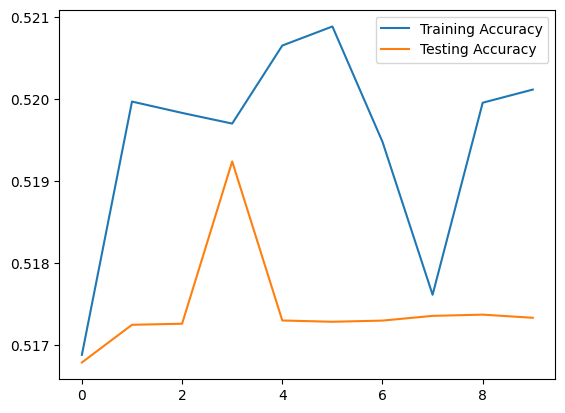

In [ ]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing Accuracy')
plt.legend()
plt.plot()

[]

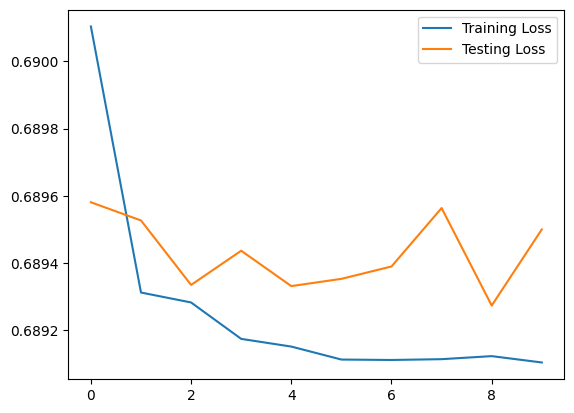

In [ ]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.legend()
plt.plot()

# LSTM Model

In [ ]:
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.Embedding(vocab_size, 32, input_length = output_sequence_length))
lstm_model.add(tf.keras.layers.LSTM(8, return_sequences=True))
lstm_model.add(tf.keras.layers.LSTM(8))
lstm_model.add(tf.keras.layers.Dense(256, activation='relu'))
lstm_model.add(tf.keras.layers.Dense(256, activation='relu'))
lstm_model.add(tf.keras.layers.Dense(1, 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

lstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics='accuracy')

In [ ]:
history1 = lstm_model.fit(X_train_vector,
                    y_train,
                    validation_data = (X_test_vector, y_test),
                    epochs = 10)

Epoch 1/10
782/782 [==============================] - 92s 110ms/step - loss: 0.6932 - accuracy: 0.5035 - val_loss: 0.6985 - val_accuracy: 0.5067
Epoch 2/10
782/782 [==============================] - 40s 52ms/step - loss: 0.6897 - accuracy: 0.5130 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/10
782/782 [==============================] - 33s 42ms/step - loss: 0.6822 - accuracy: 0.5217 - val_loss: 0.6929 - val_accuracy: 0.5101
Epoch 4/10
782/782 [==============================] - 34s 44ms/step - loss: 0.6767 - accuracy: 0.5302 - val_loss: 0.7087 - val_accuracy: 0.5135
Epoch 5/10
782/782 [==============================] - 33s 42ms/step - loss: 0.6684 - accuracy: 0.5349 - val_loss: 0.7252 - val_accuracy: 0.5115
Epoch 6/10
782/782 [==============================] - 32s 41ms/step - loss: 0.6591 - accuracy: 0.5366 - val_loss: 0.7296 - val_accuracy: 0.5115
Epoch 7/10
782/782 [==============================] - 34s 43ms/step - loss: 0.6536 - accuracy: 0.5365 - val_loss: 0.7329 - val_accuracy

The model still underfits with LSTM. I have tried to optimize it by:
* LSTM stacking
* increasing neuron size to increase complexity
* change learning rate

However, this model still underfits and can't learn from the dataset.

[]

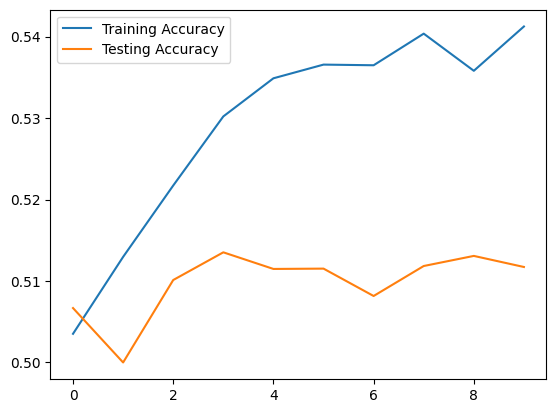

In [ ]:
plt.plot(history1.history['accuracy'], label = 'Training Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Testing Accuracy')
plt.legend()
plt.plot()

[]

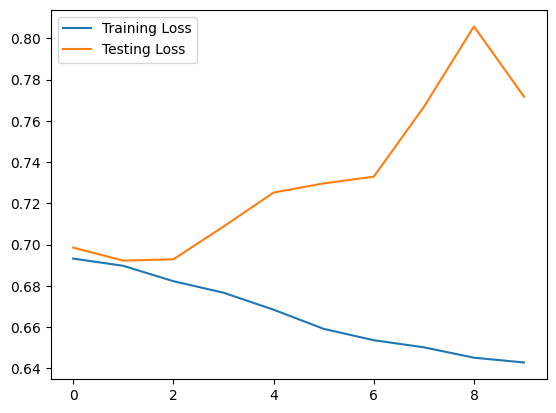

In [ ]:
plt.plot(history1.history['loss'], label = 'Training Loss')
plt.plot(history1.history['val_loss'], label = 'Testing Loss')
plt.legend()
plt.plot()

# Bidirectional LSTM Model

Trying Bidirectinal LSTM as it might be able to capture the complexity of the data which LSTM model wasn't able to.

In [ ]:
bi_lstm_model = tf.keras.models.Sequential()
bi_lstm_model.add(tf.keras.layers.Embedding(vocab_size, 16, input_length = output_sequence_length))
bi_lstm_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)))
bi_lstm_model.add(tf.keras.layers.Dense(128, activation='relu'))
bi_lstm_model.add(tf.keras.layers.Dropout(0.5))
bi_lstm_model.add(tf.keras.layers.Dense(1, 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

bi_lstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics='accuracy')

In [ ]:
history2 = bi_lstm_model.fit(X_train_vector,
                     y_train,
                     validation_data=(X_test_vector, y_test),
                     epochs = 10
                     )

Epoch 1/10
782/782 [==============================] - 72s 87ms/step - loss: 0.5007 - accuracy: 0.7535 - val_loss: 0.4964 - val_accuracy: 0.7603
Epoch 2/10
782/782 [==============================] - 34s 43ms/step - loss: 0.3680 - accuracy: 0.8494 - val_loss: 0.3312 - val_accuracy: 0.8640
Epoch 3/10
782/782 [==============================] - 34s 43ms/step - loss: 0.3149 - accuracy: 0.8784 - val_loss: 0.3281 - val_accuracy: 0.8645
Epoch 4/10
782/782 [==============================] - 33s 42ms/step - loss: 0.2999 - accuracy: 0.8837 - val_loss: 0.3285 - val_accuracy: 0.8596
Epoch 5/10
782/782 [==============================] - 31s 40ms/step - loss: 0.2825 - accuracy: 0.8915 - val_loss: 0.3326 - val_accuracy: 0.8700
Epoch 6/10
782/782 [==============================] - 31s 40ms/step - loss: 0.2617 - accuracy: 0.9007 - val_loss: 0.3195 - val_accuracy: 0.8672
Epoch 7/10
782/782 [==============================] - 32s 41ms/step - loss: 0.2593 - accuracy: 0.9004 - val_loss: 0.3251 - val_accuracy:

After optimizing the hyperparameters of Bidirectinal LSTM, this is the best model I obtained. It does have some overfitting, but was still able to get 87% validation accuracy in final epoch with no major downfall in accuracy during training iterations(epochs).

[]

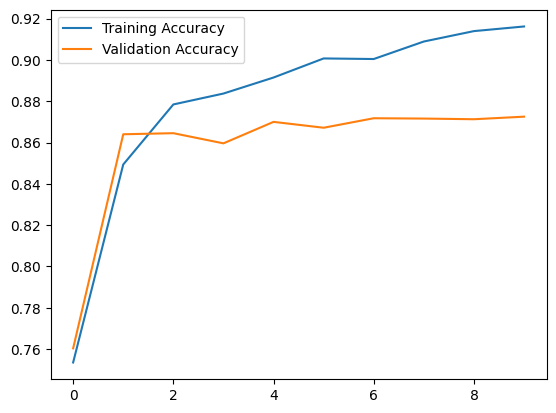

In [ ]:
plt.plot(history2.history['accuracy'], label = 'Training Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.plot()

[]

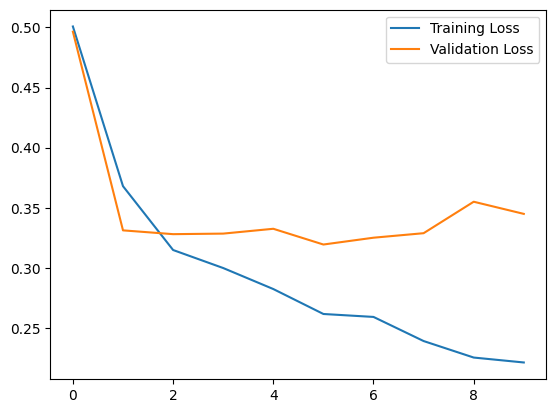

In [ ]:
plt.plot(history2.history['loss'], label = 'Training Loss')
plt.plot(history2.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.plot()

# Conclusion

While training IMDB review model with Simple Neural Network and LSTM, it wasn't able to learn the complexity present in dataset. It was underfit. To solve this problem, I used Bidirectional with LSTM, which was able to learn the complexity present in dataset, but was prone to overfitting. After optimizing the overfitting in Bidirectional LSTM model, this is the best performing model that I obtained.

#Saving the model

In [ ]:
bi_lstm_model.save('bi_lstm_model_for_IMDB_sentiment_analysis.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle
with open('bi_lstm_model_for_IMDB_sentiment_analysis.pickle', 'wb') as file:
  pickle.dump(bi_lstm_model, file)